<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/FractalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection, Cleaning, Amalgamation

### Mounting drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


### File path and data frames


In [0]:
aqiFilePath = base_dir + '/aqidaily_2016_to_2019.csv'
weatherFilePath = base_dir + '/bakersfield_weather_2016_to_2019.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
aqiDataFrame = pd.read_csv(aqiFilePath)
weatherDataFrame = pd.read_csv(weatherFilePath)

In [0]:
aqiDataFrame.head(2)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/16,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,1/2/16,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [0]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2016-01-01,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,2016-01-02,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Column names to lower case

In [0]:
aqiDataFrame.columns = map(str.lower, aqiDataFrame.columns)
aqiDataFrame.columns

Index(['date', 'overall aqi value', 'main pollutant',
       'site name (of overall aqi)', 'site id (of overall aqi)',
       'source (of overall aqi)', 'co', 'ozone', 'pm10', 'pm25', 'no2'],
      dtype='object')

### Common date format

In [0]:
aqiDataFrame['date'] = pd.to_datetime(aqiDataFrame['date']).dt.strftime('%m/%d/%Y')
weatherDataFrame['date'] = pd.to_datetime(weatherDataFrame['date']).dt.strftime('%m/%d/%Y')

In [0]:
aqiDataFrame.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [0]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Merging the datasets

In [0]:
df = pd.merge(aqiDataFrame, weatherDataFrame, on='date', how='inner')

In [0]:
df.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Renaming column names

In [0]:
df.rename(columns = {'overall aqi value':'aqi', 'site name (of overall aqi)':'location', 'site id (of overall aqi)':'location id',
                     'source (of overall aqi)' : 'aqi source'}, inplace = True) 

In [0]:
df.head(2)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


In [0]:
df.drop(df.columns[[15,16,17,19,20]], axis=1, inplace=True)

### Shape of DF

In [0]:
df.shape

(1461, 17)

### Columns with NaN 

In [0]:
df.columns[df.isna().any()].tolist()

['precipitation', 'pressure']

### Replacing invalid data with 0

In [0]:
df = df.fillna(0)
df['co'].replace('.','0',inplace=True)
df['no2'].replace('.','0',inplace=True)
df['pm10'].replace('.','0',inplace=True)
df

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,6.5,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,3.6,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,11.5,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,7.2,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,7.6,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/2019,36,PM2.5,Bakersfield-California,06-029-0014,AirNow,0,33,0,36,0,7.9,3.9,11.7,0.0,4.0,1017.3
1457,12/28/2019,58,PM2.5,Bakersfield-California,06-029-0014,AQS,0,32,2,58,0,7.1,1.7,13.3,0.0,3.2,1020.8
1458,12/29/2019,60,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0,31,3,60,0,7.6,2.8,15.6,0.0,2.9,1019.5
1459,12/30/2019,62,PM2.5,Bakersfield-California,06-029-0014,AQS,0,34,4,62,0,10.4,5.6,13.9,0.0,7.9,1018.4


In [0]:
# c = df['temperature_min'] < 0
# df['temperature_min'] =  df['temperature_min'].astype(float)
# newdf = df[c]
# newdf

In [0]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                  object
ozone                int64
pm10                object
pm25                 int64
no2                 object
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

### Object to Float

In [0]:
def covert_to_float(param):
    df[param] =  df[param].astype(float)

arr = ['aqi','co','no2','pm10']
for i in arr:
    covert_to_float(i)

In [0]:
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

In [0]:
df.columns[df.isna().any()].tolist()

[]

In [0]:
df.columns

Index(['date', 'aqi', 'main pollutant', 'location', 'location id',
       'aqi source', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature',
       'temperature_min', 'temperature_max', 'precipitation', 'windspeed',
       'pressure'],
      dtype='object')

# Heatmap: Correlation

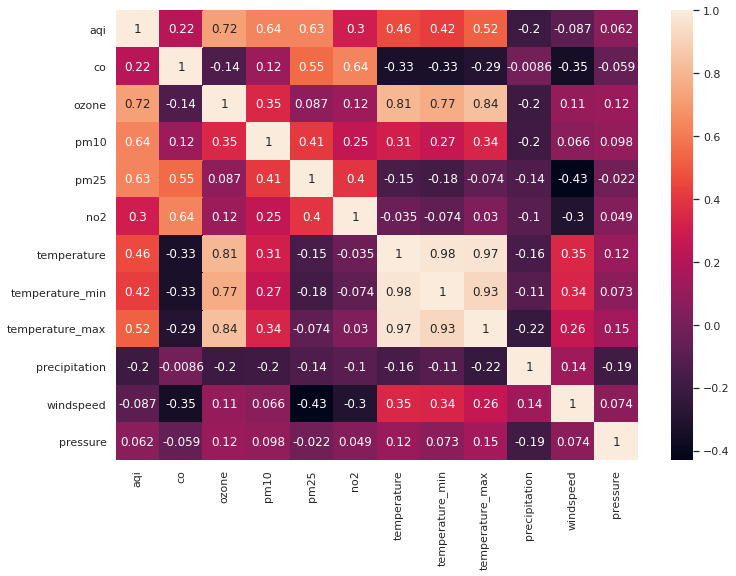

In [0]:
import seaborn as sns
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

# Fractal Clustering

In [0]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Elbow Method

In [0]:
def elbow_method():
    Error =[]
    x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    

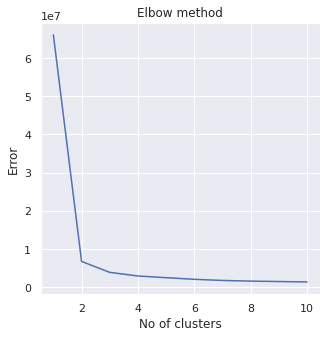

In [0]:
elbow_method()

## Silhouette score

In [0]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9186307855556037)
For n_clusters = 3, silhouette score is 0.44992007778317883)
For n_clusters = 4, silhouette score is 0.48107366158947495)
For n_clusters = 5, silhouette score is 0.3883478935409914)
For n_clusters = 6, silhouette score is 0.3832946242038697)
For n_clusters = 7, silhouette score is 0.3799355160735736)
For n_clusters = 8, silhouette score is 0.3208147329541496)
For n_clusters = 9, silhouette score is 0.31841265029319027)


## GMM

In [0]:
gmm = GaussianMixture(n_components = 2 , covariance_type='spherical').fit(df.iloc[:,[1,6,7,8,9,10,11,12,13,14,15,16]].values)
y_gmm = gmm.predict(df.iloc[:,[1,6,7,8,9,10,11,12,13,14,15,16]].values)
df['clusterGMM'] = y_gmm
df.tail()

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,clusterGMM
1456,12/27/2019,36.0,PM2.5,Bakersfield-California,06-029-0014,AirNow,0.0,33,0.0,36,0.0,7.9,3.9,11.7,0.0,4.0,1017.3,0
1457,12/28/2019,58.0,PM2.5,Bakersfield-California,06-029-0014,AQS,0.0,32,2.0,58,0.0,7.1,1.7,13.3,0.0,3.2,1020.8,0
1458,12/29/2019,60.0,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0.0,31,3.0,60,0.0,7.6,2.8,15.6,0.0,2.9,1019.5,0
1459,12/30/2019,62.0,PM2.5,Bakersfield-California,06-029-0014,AQS,0.0,34,4.0,62,0.0,10.4,5.6,13.9,0.0,7.9,1018.4,0
1460,12/31/2019,85.0,PM2.5,Bakersfield-California,06-029-0014,AQS,0.0,35,3.0,85,0.0,8.3,2.8,14.4,0.0,6.8,0.0,1


## K-Means

In [0]:
# x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16,17]].values
gmm = df.iloc[: , [1,6,7,8,9,10,11,12,13,14,15,16,17]].copy()
gmm_cluster_1 = gmm.loc[(gmm['clusterGMM'] == 0)]
gmm_cluster_2 = gmm.loc[(gmm['clusterGMM'] == 1)]

kmeans = KMeans(n_clusters=2)

y_cluster_1 = kmeans.fit_predict(gmm_cluster_1.values)
gmm_cluster_1['clusterKmeans'] = y_cluster_1

y_cluster_2 = kmeans.fit_predict(gmm_cluster_2.values)
gmm_cluster_2['clusterKmeans'] = y_cluster_2
gmm_cluster_2.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,aqi,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,clusterGMM,clusterKmeans
1393,74.0,0.0,74,14.0,59,0.0,21.8,11.7,31.1,0.0,8.6,0.0,1,1
1437,37.0,0.0,37,2.0,35,0.0,14.9,8.3,17.8,7.6,6.8,0.0,1,1
1438,51.0,0.0,35,1.0,51,0.0,11.1,8.3,15.0,0.0,5.4,0.0,1,1
1440,78.0,0.0,37,1.0,78,0.0,9.2,6.7,15.0,0.0,4.7,0.0,1,1
1460,85.0,0.0,35,3.0,85,0.0,8.3,2.8,14.4,0.0,6.8,0.0,1,1


In [0]:
frames = [gmm_cluster_1, gmm_cluster_2]
clusteredResult = pd.concat(frames)
clusteredResult.head()

,aqi,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,clusterGMM,clusterKmeans
0,148.0,8.0,37,52.0,148,23.0,4.4,-2.7,12.8,0.0,6.5,1020.3,0,0
1,113.0,7.0,37,14.0,113,25.0,7.1,1.1,13.9,0.0,3.6,1017.9,0,1
2,80.0,7.0,36,9.0,80,28.0,9.6,3.9,20.0,0.0,11.5,1011.5,0,1
3,87.0,5.0,37,8.0,87,28.0,10.6,5.6,18.3,0.0,7.2,1008.8,0,1
4,54.0,5.0,41,6.0,54,30.0,12.5,8.3,14.4,12.2,7.6,1008.2,0,1


Text(0, 0.5, 'Temperature')

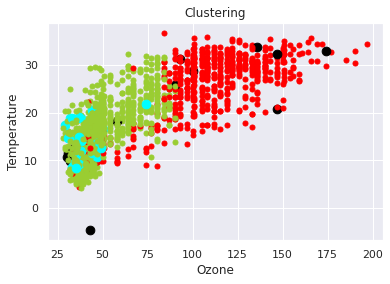

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(0, clusteredResult.shape[0]):
  if clusteredResult['clusterGMM'][i] == 0 and clusteredResult['clusterKmeans'][i] == 0:
    scatter1 = ax.scatter(clusteredResult['ozone'][i], clusteredResult['temperature'][i], c='red',s=25)
  if clusteredResult['clusterGMM'][i] == 0 and clusteredResult['clusterKmeans'][i] == 1:
    scatter2 = ax.scatter(clusteredResult['ozone'][i], clusteredResult['temperature'][i], c='yellowgreen',s=25)
  if clusteredResult['clusterGMM'][i] == 1 and clusteredResult['clusterKmeans'][i] == 0:
    scatter3 = ax.scatter(clusteredResult['ozone'][i], clusteredResult['temperature'][i], c='black',s=75)
  if clusteredResult['clusterGMM'][i] == 1 and clusteredResult['clusterKmeans'][i] == 1:
    scatter4 = ax.scatter(clusteredResult['ozone'][i], clusteredResult['temperature'][i], c='aqua',s=75)

ax.set_title('Clustering')
ax.set_xlabel('Ozone')
ax.set_ylabel('Temperature')  